<a href="https://colab.research.google.com/github/hrushikeshsahu19/Taxi-trip-time-Prediction/blob/main/Hrushikesh_Sahu_Team_3_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import xgboost
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import warnings
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NYC Taxi Data.csv')

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
dataset.shape

(1458644, 11)

###**it has 1458644 rows and 11 columns**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


###***Threre is No null values in our dataset***

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

0

###***Threre is No duplicate values in our dataset***

In [ ]:
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
dataset[dataset['trip_duration']==3.526282e+06]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,year,month,day_num,hour,minute,trip_duration_hour,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday


###***There are no numerical columns with missing data***
###***The passenger count varies between 1 and 9 with most people number of people being 1 or 2***
###***The trip duration varying from 1s to 1939736s or 538 hrs. There are definitely some outliers present which must be treated.***

In [ ]:
list(dataset.columns)

['id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration']

###***Name of the columns in our dataset is***
 'id',
 'vendor_id',
 'pickup_datetime',
 'dropoff_datetime',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration'

In [ ]:
dataset['vendor_id'].value_counts().reset_index()

,index,vendor_id
0,2,780302
1,1,678342


In [ ]:
dataset['passenger_count'].value_counts().reset_index()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333
5,4,28404
6,0,60
7,7,3
8,9,1
9,8,1


In [ ]:
dataset['store_and_fwd_flag'].value_counts().reset_index()

,index,store_and_fwd_flag
0,N,1450599
1,Y,8045


#**Exploratory Data Analysis**

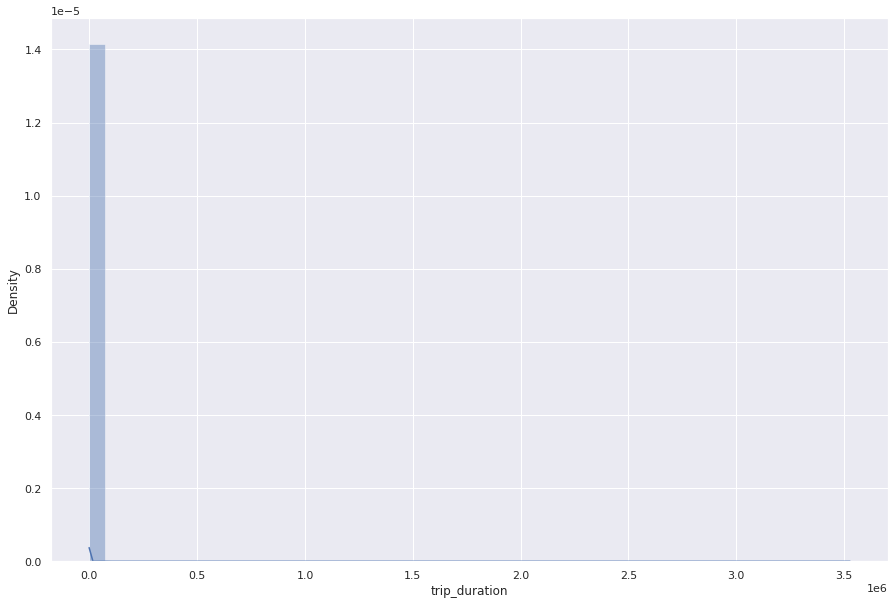

In [ ]:
# Dependent variable 'trip_duration'
plt.figure(figsize=(15,10))
sns.distplot(dataset['trip_duration'],color="B")

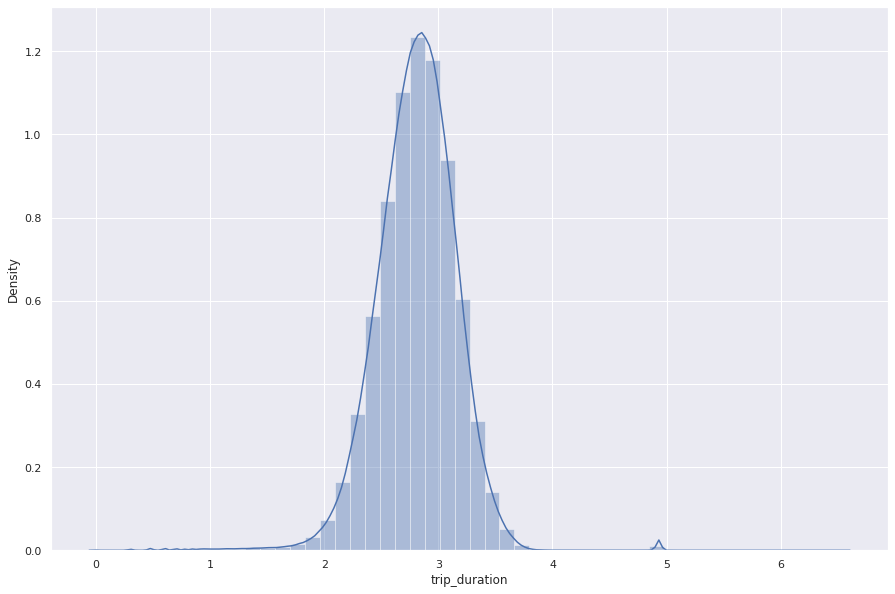

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dataset['trip_duration']),color="B")

##***take the log of trip_duration and plot the distribution   its looks like symmetric distributions***

Text(0.5, 1.0, 'Dropoff')

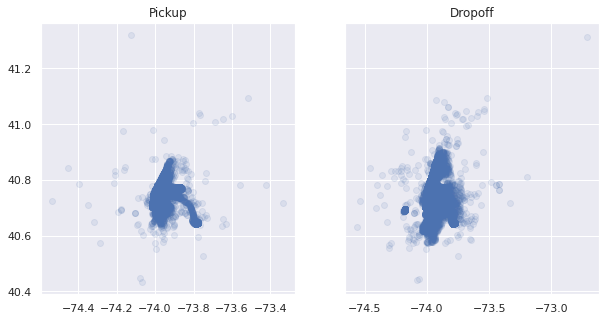

In [ ]:

#plot to see the differences - minimal, but there is some change
n = 100000 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
ax1.scatter(dataset.pickup_longitude[:n], 
            dataset.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(dataset.dropoff_longitude[:n], 
            dataset.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

In [ ]:
passenger_count_df=dataset['passenger_count'].value_counts().reset_index()
passenger_count_df.head()

,index,passenger_count
0,1,1033540
1,2,210318
2,5,78088
3,3,59896
4,6,48333


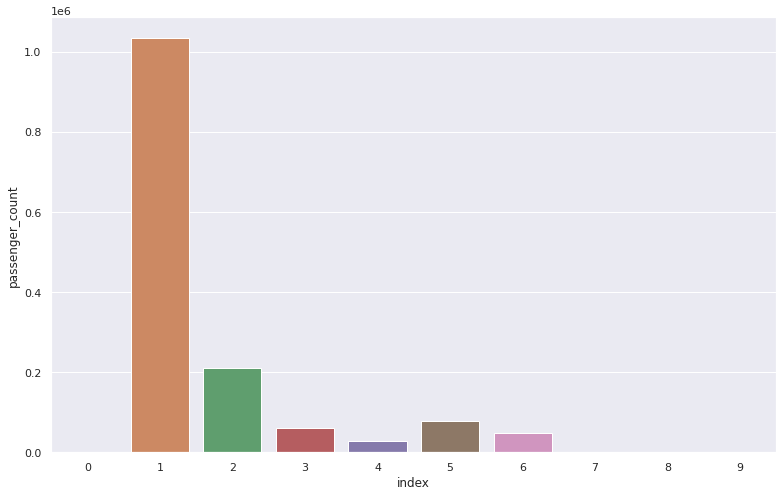

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='passenger_count',data=passenger_count_df)

In [ ]:
vendor_id_df=dataset['vendor_id'].value_counts().reset_index()
vendor_id_df

,index,vendor_id
0,2,780302
1,1,678342


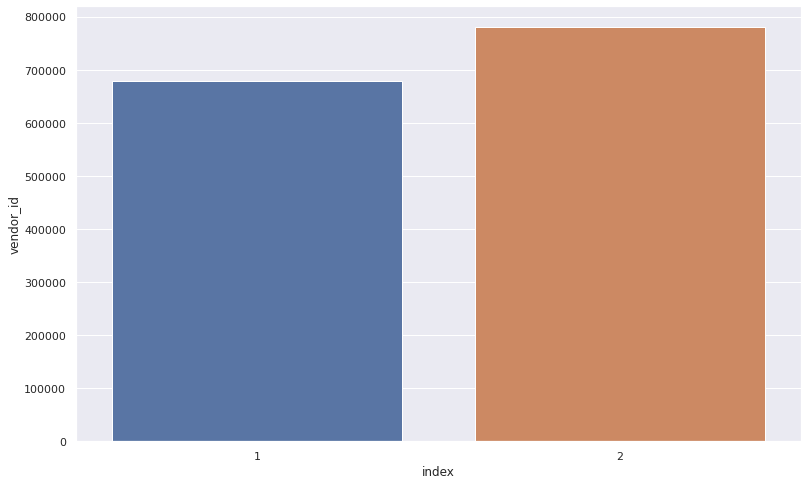

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='vendor_id',data=vendor_id_df)

In [ ]:
store_and_fwd_flag_df=dataset['store_and_fwd_flag'].value_counts().reset_index()
store_and_fwd_flag_df

,index,store_and_fwd_flag
0,N,1450599
1,Y,8045


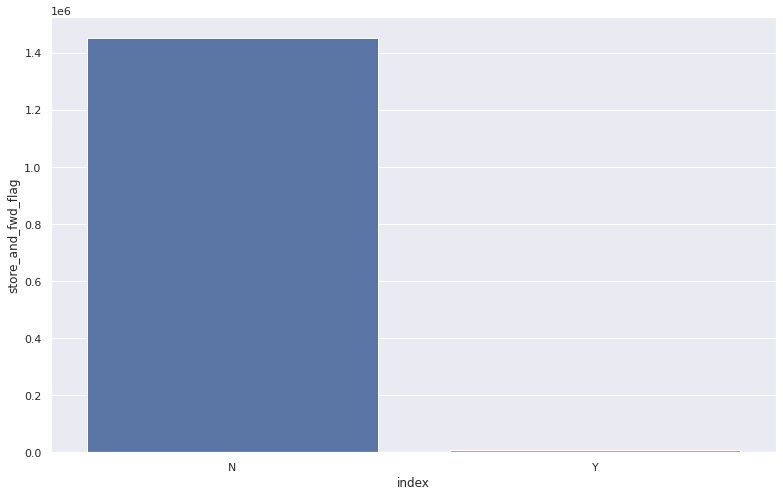

In [ ]:
plt.figure(figsize=(13,8))
sns.barplot(x='index',y='store_and_fwd_flag',data=store_and_fwd_flag_df)

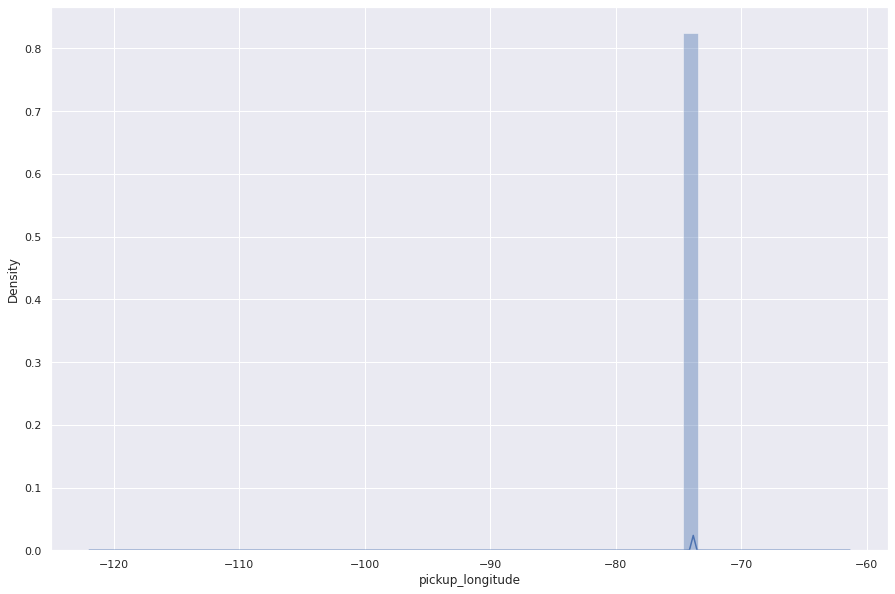

In [ ]:
# InDependent variable 'pickup_longitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['pickup_longitude'],color="B")

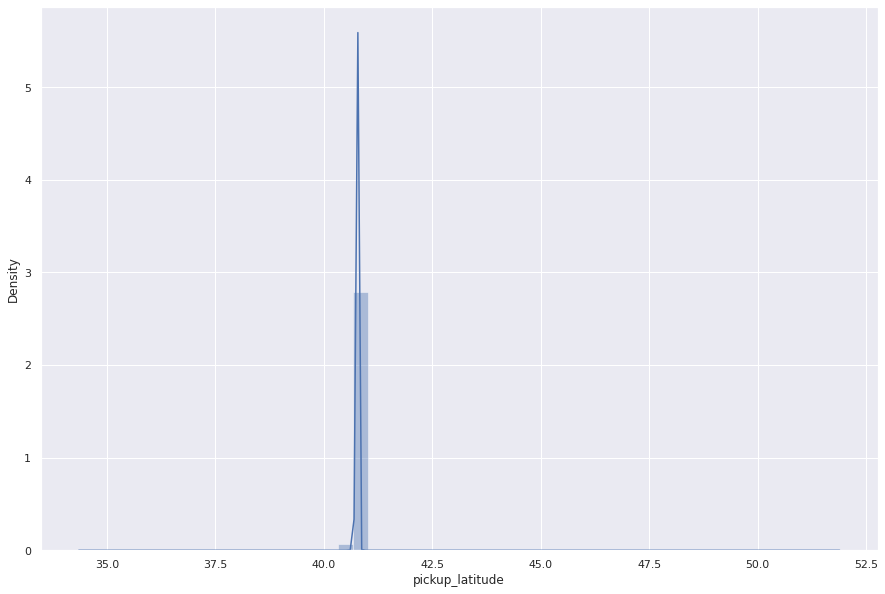

In [ ]:
# InDependent variable 'pickup_latitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['pickup_latitude'],color="B")

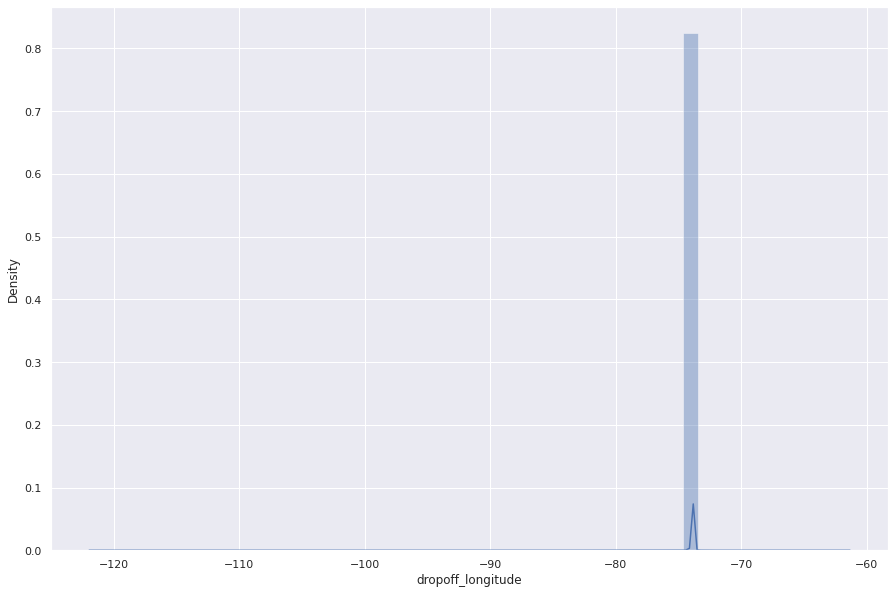

In [ ]:
# InDependent variable 'dropoff_longitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['dropoff_longitude'],color="B")

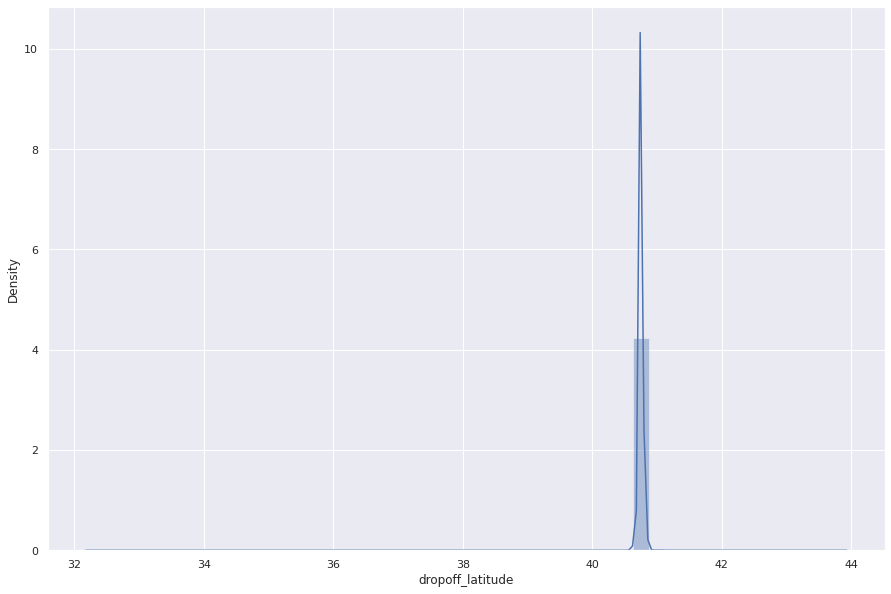

In [ ]:
# InDependent variable 'dropoff_longitude'
plt.figure(figsize=(15,10))
sns.distplot(dataset['dropoff_latitude'],color="B")

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

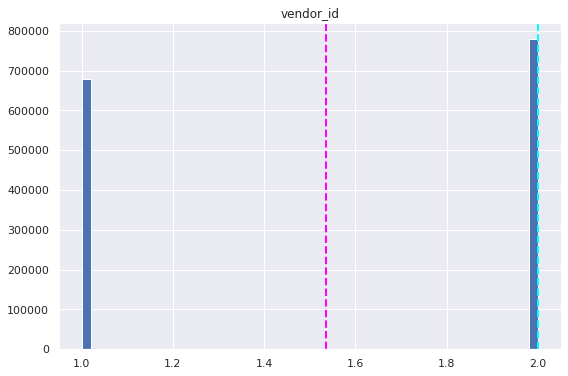

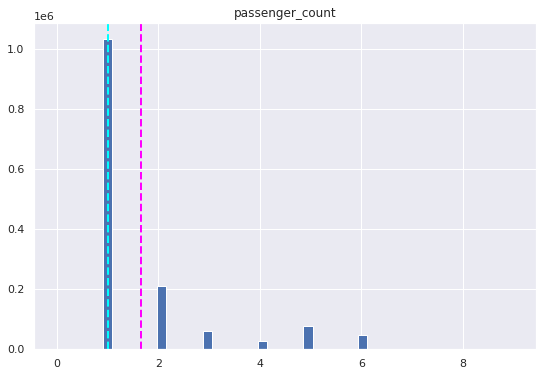

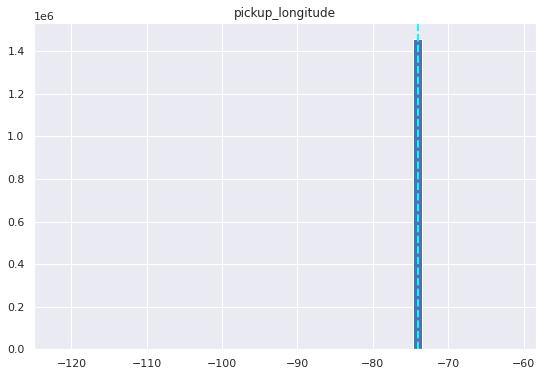

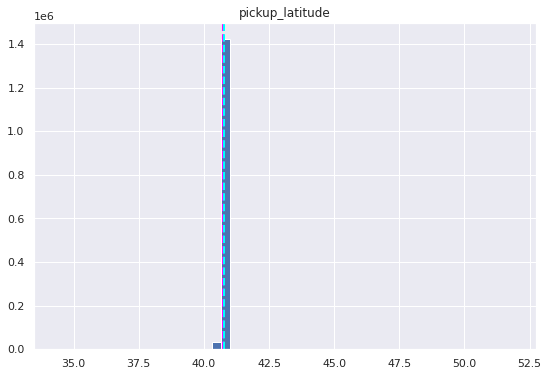

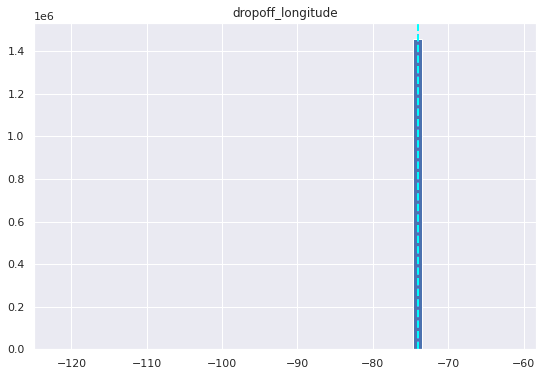

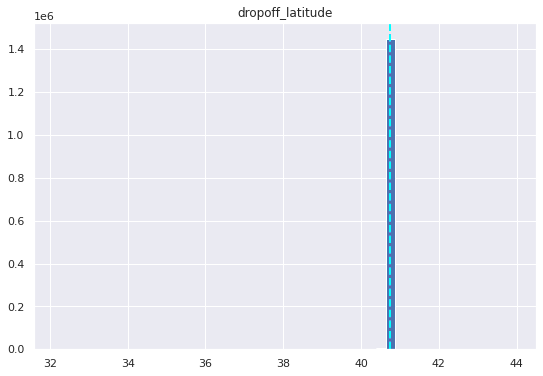

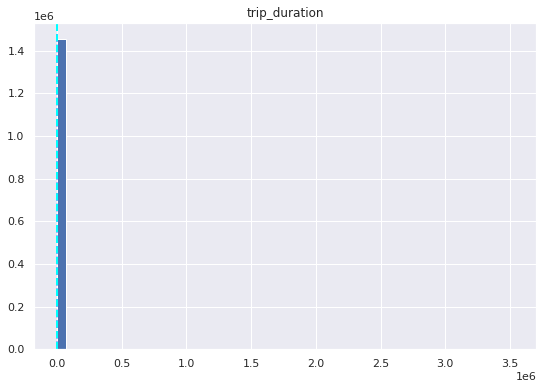

In [ ]:

# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#****Transformation****
###***square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data***

###***log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data***

###***inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data***

###***Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.***

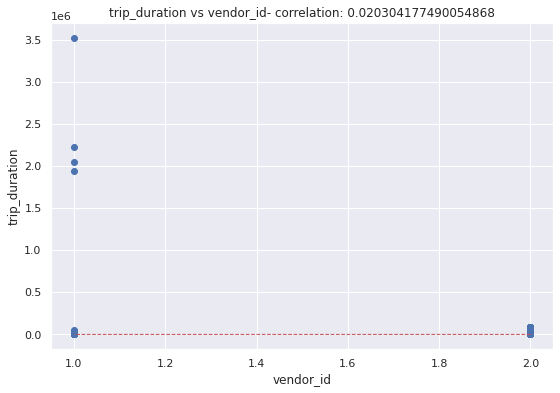

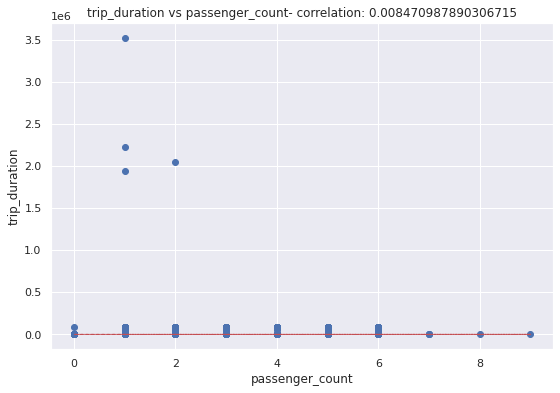

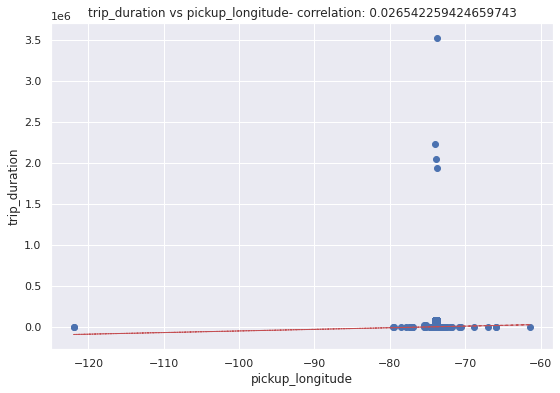

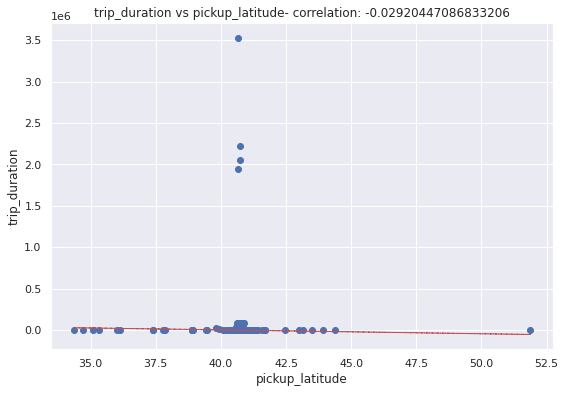

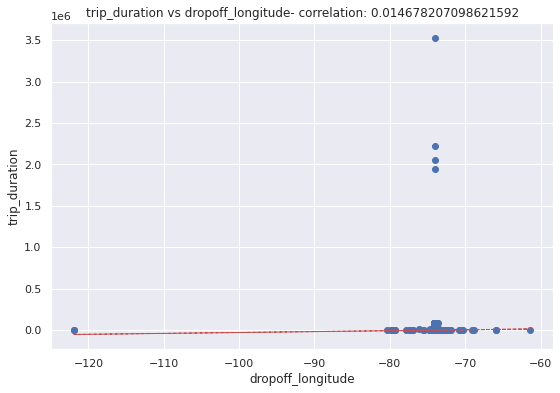

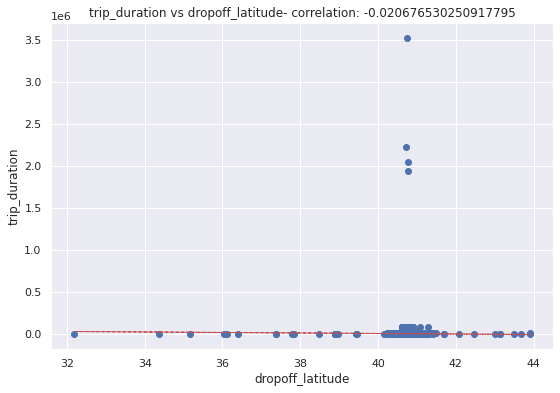

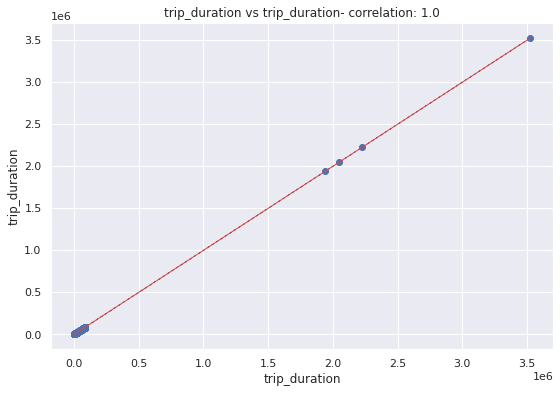

In [ ]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['trip_duration'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

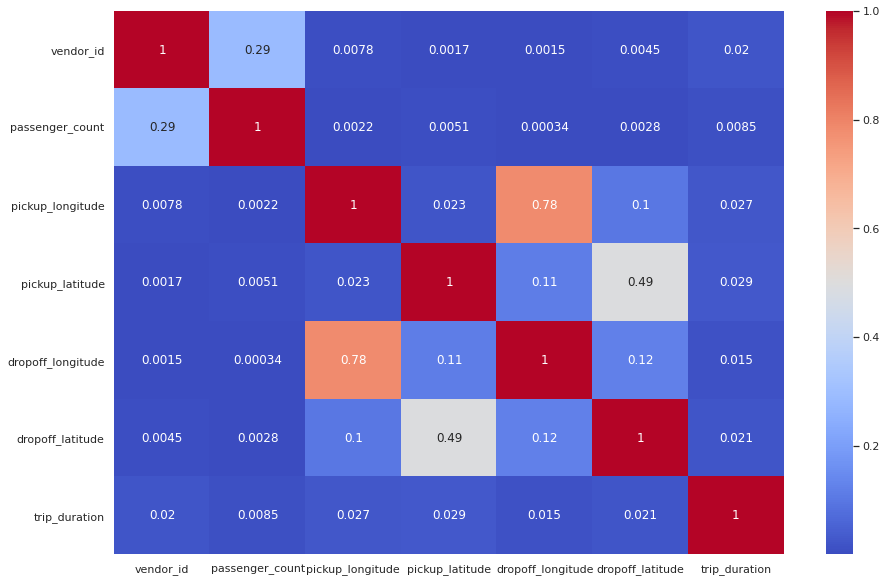

In [ ]:
## Correlation
plt.figure(figsize=(15,10))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


##***Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight)***

##***it is 3 types***

##***1.positive correlation :A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases***

##***2.Negative correlation : Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1***

##***3.Zero correlation :0 indicates no correlation***

##***In statistics, a perfect positive correlation is represented by the correlation coefficient value +1.0, while 0 indicates no correlation, and -1.0 indicates a perfect inverse (negative) correlation***

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['trip_duration','pickup_longitude','dropoff_longitude']]])

,variables,VIF
0,vendor_id,1.141365e+01
1,passenger_count,2.838587e+00
2,pickup_latitude,1.380164e+06
3,dropoff_latitude,1.380186e+06


###indepandent variable are highly correlated to each other 

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,year,month,day,hour,minute,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,2016,3,14,17,24,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,2016,6,12,0,43,0.184167,9.806736
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103,2016,1,19,11,35,0.590000,10.825598
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,2016,4,6,19,32,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,2016,3,26,13,30,0.120833,9.839682


In [6]:
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

##***above function  help us to find the distance between (pickup_longitude,pickup_latitude) and (dropoff_longitude,dropoff_latitude)***

In [7]:
dataset["distance"] = dataset.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

###***created a new features distance from existing features***

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.387103
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962


In [ ]:
dataset.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.441944e+00
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.297887e+00
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.232223e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.094374e+00
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.876554e+00
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.241298e+03


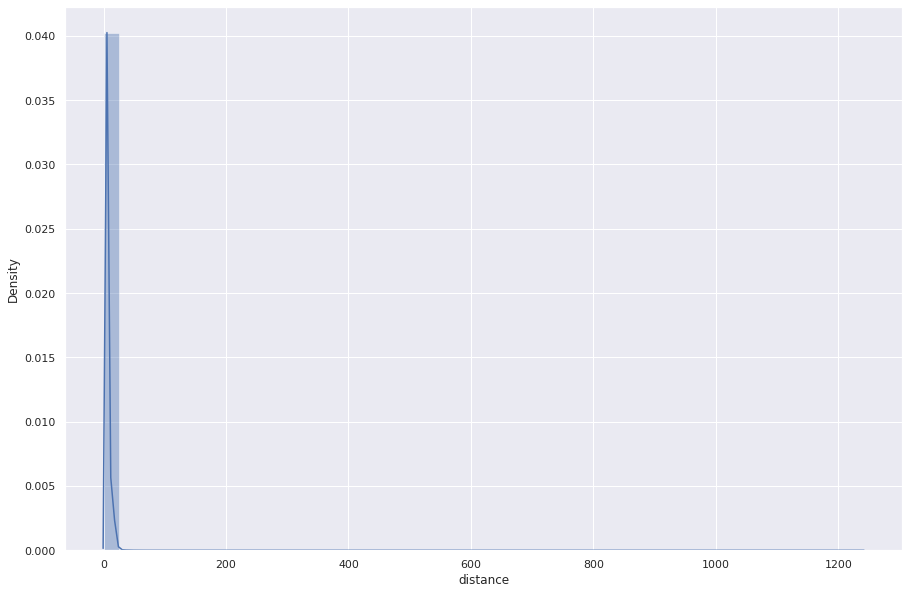

In [ ]:
# InDependent variable 'distance'
plt.figure(figsize=(15,10))
sns.distplot(dataset['distance'],color="B")

##***plot the distribution of 'distance' and it looks like postively skew***

###***This graph looks likes positive skew distribution because most of values are lies in left part of our graph***

###***positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode***

###***negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode***

In [4]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in dataset.sample(1000).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)


display(mapa)


In [8]:
import folium
f = folium.Figure(width=1500, height=500)
mapa = folium.Map(location = (40.7679, -73.9822), zoom_start=11).add_to(f)

for index, row in dataset[dataset["distance"]>20].sample(200).iterrows():
    folium.Marker([row["pickup_latitude"], row["pickup_longitude"]], icon=folium.Icon(color="blue")).add_to(mapa)
    folium.Marker([row["dropoff_latitude"], row["dropoff_longitude"]], icon=folium.Icon(color="red")).add_to(mapa)


display(mapa)

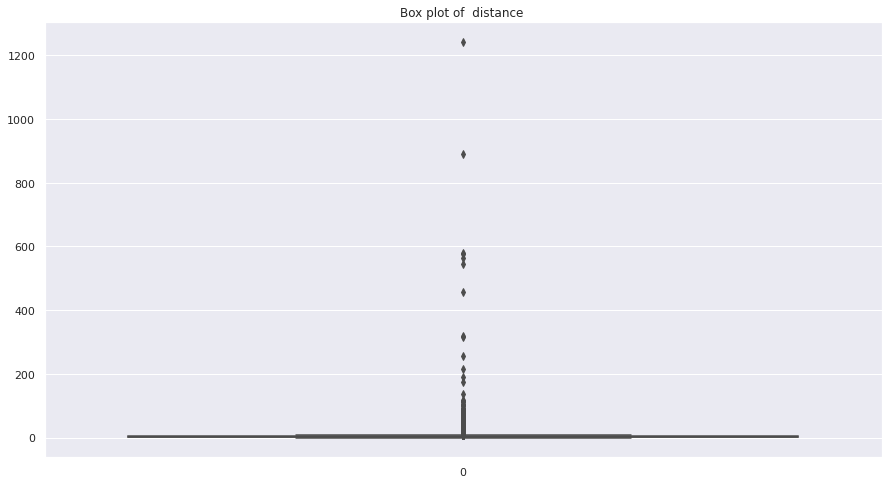

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  distance ")
ax = sns.boxplot(data=dataset['distance'], orient="v")

###**plot the box plot of features distance  for outlier**

#**IQR=Q3-Q1**

#**lower_limit_outlier=Q1-1.5*IQR**

#**upper_limit_outlier=Q3+1.5*IQR**

##**so we have to take the values which is greater then lower limit outlier and less then upper limit outlier**

#**remove the outlier present in distance**

In [ ]:
percentile_q1 = np.percentile(dataset['distance'],25)
print(percentile_q1)
percentile_q2 = np.percentile(dataset['distance'],50)
print(percentile_q2)
percentile_q3 = np.percentile(dataset['distance'],75)
print(percentile_q3)

1.23222326737417
2.0943743977620386
3.8765539736919856


In [ ]:
iqr=percentile_q3 - percentile_q1
lower_limit_outlier=percentile_q1-1.5*iqr
upper_limit_outlier=percentile_q3+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier)
print("Upper limit for outlier  :",upper_limit_outlier)

lower limit for outlier  : -2.734272792102554
Upper limit for outlier  : 7.843050033168709


In [ ]:
dataset=dataset[dataset['distance']>0]
dataset=dataset[dataset['distance']<upper_limit_outlier]

In [ ]:
dataset.shape

(1312074, 12)

##***after removeing outlier from distance columns the shape of our dataset reduced to (1312074, 12)***

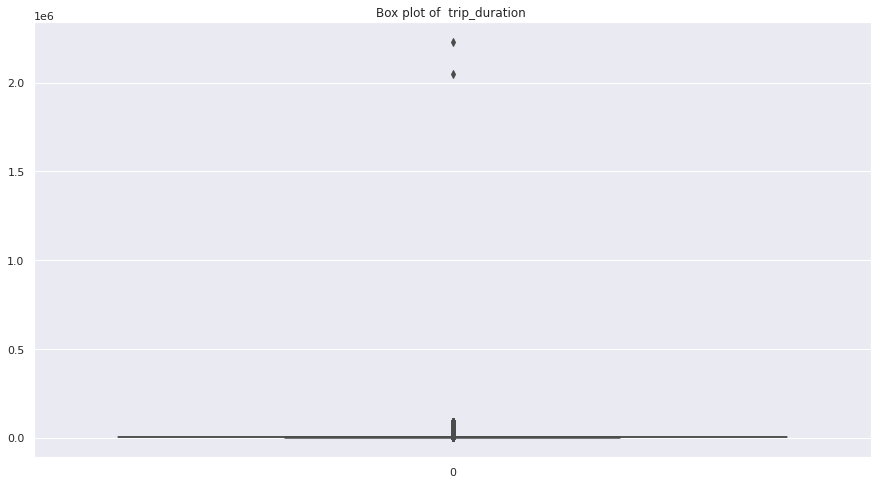

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  trip_duration ")
ax = sns.boxplot(data=dataset['trip_duration'], orient="v")

In [ ]:
percentile_q1_trip_duration = np.percentile(dataset['trip_duration'],25)
print(percentile_q1_trip_duration)
percentile_q2_trip_duration = np.percentile(dataset['trip_duration'],50)
print(percentile_q2_trip_duration)
percentile_q3_trip_duration = np.percentile(dataset['trip_duration'],75)
print(percentile_q3_trip_duration)

374.0
606.0
932.0


In [ ]:
iqr=percentile_q3_trip_duration - percentile_q1_trip_duration
lower_limit_outlier_trip_duration=percentile_q1_trip_duration-1.5*iqr
upper_limit_outlier_trip_duration=percentile_q3_trip_duration+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier_trip_duration)
print("Upper limit for outlier  :",upper_limit_outlier_trip_duration)

lower limit for outlier  : -463.0
Upper limit for outlier  : 1769.0


In [ ]:
dataset=dataset[dataset['trip_duration']>0]
dataset=dataset[dataset['trip_duration']<upper_limit_outlier_trip_duration]

In [ ]:
dataset.shape

(1271808, 12)

##***after removeing outlier from distance columns the shape of our dataset reduced to (1271808, 12)***

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,1.099287


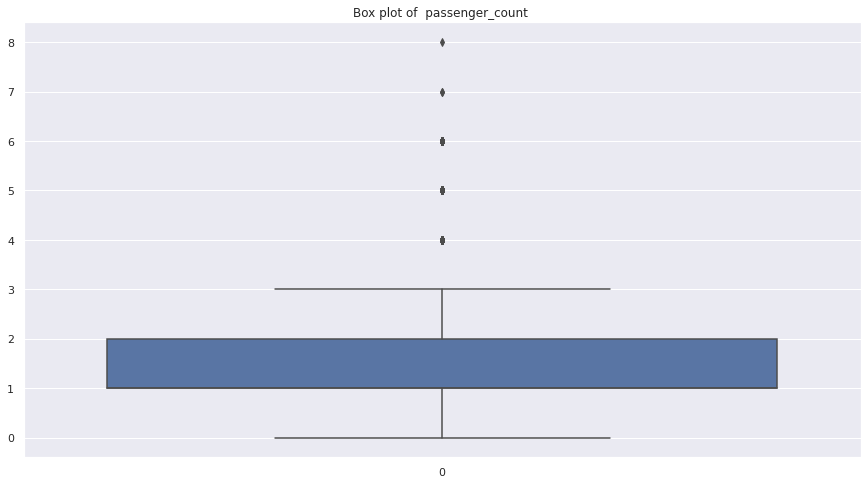

In [ ]:
plt.figure(figsize=(15,8))
plt.title("Box plot of  passenger_count ")
ax = sns.boxplot(data=dataset['passenger_count'], orient="v")

In [ ]:
percentile_q1_passenger_count = np.percentile(dataset['passenger_count'],25)
print(percentile_q1_passenger_count)
percentile_q2_passenger_count = np.percentile(dataset['passenger_count'],50)
print(percentile_q2_passenger_count)
percentile_q3_passenger_count = np.percentile(dataset['passenger_count'],75)
print(percentile_q3_passenger_count)

1.0
1.0
2.0


In [ ]:
iqr=percentile_q3_passenger_count - percentile_q1_passenger_count
lower_limit_outlier_passenger_count=percentile_q1_passenger_count-1.5*iqr
upper_limit_outlier_passenger_count=percentile_q3_passenger_count+1.5*iqr

In [ ]:
print("lower limit for outlier  :",lower_limit_outlier_passenger_count)
print("Upper limit for outlier  :",upper_limit_outlier_passenger_count)

lower limit for outlier  : -0.5
Upper limit for outlier  : 3.5


In [ ]:
dataset=dataset[dataset['passenger_count']>0]
dataset=dataset[dataset['passenger_count']<upper_limit_outlier_passenger_count]

In [ ]:
dataset.shape

(1137658, 12)

##***after removeing outlier from distance columns the shape of our dataset reduced to (1029043, 12)***

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.716775


In [ ]:
dataset["pickup_datetime"] = pd.to_datetime(dataset["pickup_datetime"], format="%Y-%m-%d %H:%M:%S")

In [ ]:
dataset['Day']=dataset['pickup_datetime'].dt.day_name()

In [ ]:
dataset["year"] = dataset["pickup_datetime"].apply(lambda x: x.year)
dataset["month"] = dataset["pickup_datetime"].apply(lambda x: x.month)
dataset["day_num"] = dataset["pickup_datetime"].apply(lambda x: x.day)
dataset["hour"] = dataset["pickup_datetime"].apply(lambda x: x.hour)
dataset["minute"] = dataset["pickup_datetime"].apply(lambda x: x.minute)

##**create some new features  year,month,day,hour,minitue from pickup_datetime**

In [ ]:
dataset['trip_duration_hour']=dataset['trip_duration']/3600 
dataset['speed']=dataset['distance']/dataset['trip_duration_hour']

##***create some new features trip_duration_hour from trip_duration and  speed from distance and time***

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,Day,year,month,day_num,hour,minute,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43,0.184167,9.806736
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30,0.120833,9.839682
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.716775,Saturday,2016,5,21,7,54,0.430833,13.269110


In [ ]:
dataset['month'].unique()

array([3, 6, 4, 5, 2, 1])

##***unique month of our dataset are [3, 6, 1, 4, 5, 2]***

In [ ]:
dataset['year'].unique()

array([2016])

##**unique year of our dataset is 2016**

In [ ]:
dataset['day_num'].unique()

array([14, 12,  6, 26, 21, 27, 10, 19,  1, 16,  5, 28,  9, 25, 20, 13, 17,
       11, 23,  3, 18,  7,  2, 29, 24, 22,  4, 15, 30, 31,  8])

##***unique date of our dataset are [14, 12, 19,  6, 26, 30, 17, 21, 27, 10, 15,  1, 16, 11,  5, 28,  9, 25, 20, 13, 23,  3, 18,  7,  2, 22, 29, 24,  4, 31,  8]***

In [ ]:
dataset['hour'].unique()

array([17,  0, 19, 13,  7, 23, 21, 22,  9, 20, 15,  8,  2, 12,  3, 10, 14,
       16,  1, 11, 18,  6,  5,  4])

##***unique month of our dataset are [17,  0, 11, 19, 13, 22,  7, 23, 21,  9, 20, 15,  8,  2, 12,  3, 10,   14, 16,  1, 18,  6,  5,  4]***

In [ ]:
dataset['minute'].unique()

array([24, 43, 32, 30, 54, 12, 45,  8, 52, 58, 29, 48, 55, 47, 23, 34, 36,
       27, 56,  7, 57,  3, 11,  0, 26, 14, 28,  5, 41, 59, 37, 50, 18,  4,
       46, 16, 38, 22, 13, 20, 25, 17, 21, 40,  9, 31, 39, 15,  1, 49, 51,
        6, 53, 42,  2, 44, 10, 35, 19, 33])

In [ ]:
day_df=dataset.groupby('Day')['id'].count().reset_index()
day_df

,Day,id
0,Friday,173869
1,Monday,146482
2,Saturday,175351
3,Sunday,151448
4,Thursday,168623
5,Tuesday,158503
6,Wednesday,163382


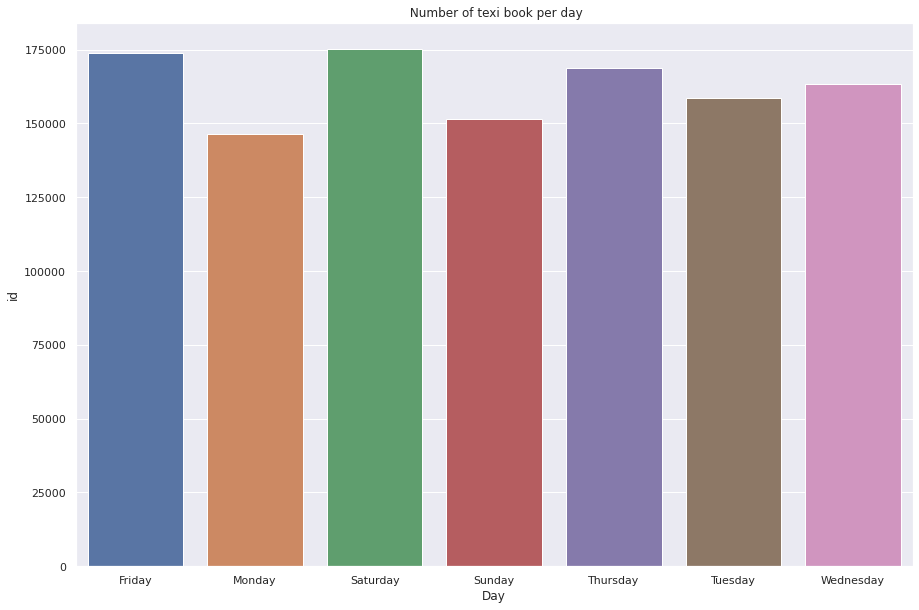

In [ ]:
plt.figure(figsize=(15,10))
plt.title(' Number of texi book per day')
sns.barplot(x='Day',y='id',data=day_df)

##***from above graph we can see that in saturday people are booking Taxi more number of times and in Monday People are bookiung texi less numbers times***

In [ ]:
month_df=dataset.groupby('month')['id'].count().reset_index()
month_df

,month,id
0,1,180687
1,2,188675
2,3,201182
3,4,195803
4,5,190974
5,6,180337


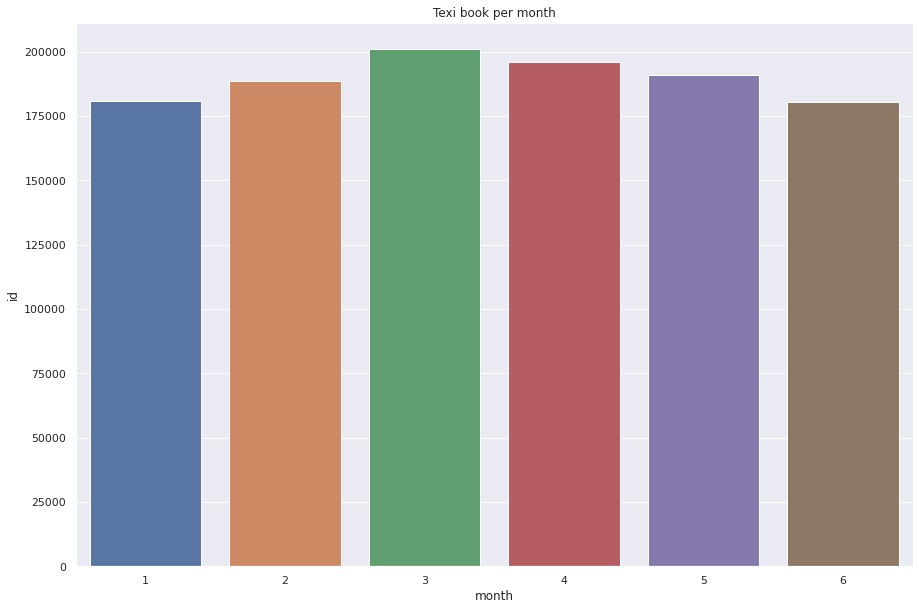

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Texi book per month')
sns.barplot(x='month',y='id',data=month_df)

##***from this graph we can conclude that more texi is booking in the month of 3(March) and least booking are in the month 1(january)***

In [ ]:
day_df=dataset.groupby('day_num')['id'].count().reset_index()
day_df

,day_num,id
0,1,36132
1,2,37447
2,3,37457
3,4,39066
4,5,39275
5,6,38947
6,7,38325
7,8,37642
8,9,39096
9,10,38034


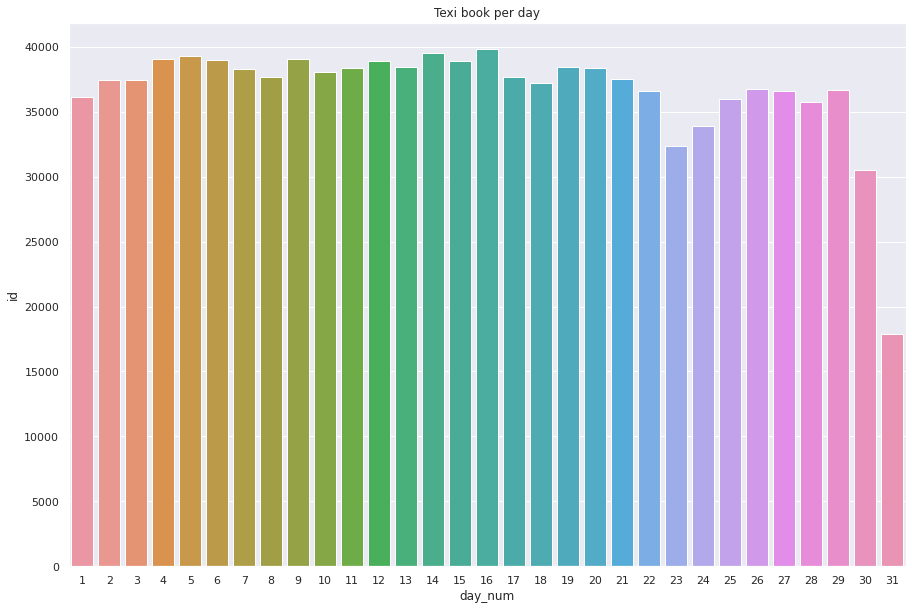

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Texi book per day')
sns.barplot(x='day_num',y='id',data=day_df)

In [ ]:
hour_df=dataset.groupby('hour')['id'].count().reset_index()
hour_df

,hour,id
0,0,40707
1,1,29592
2,2,21700
3,3,15839
4,4,10978
5,5,10384
6,6,25908
7,7,44899
8,8,53699
9,9,53663


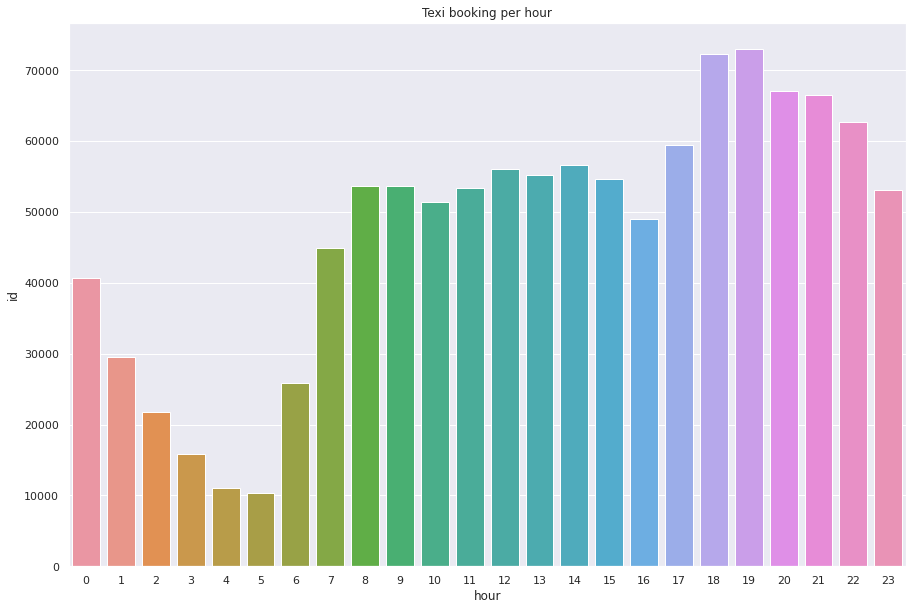

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Texi booking per hour')
sns.barplot(x='hour',y='id',data=hour_df)

###**from above graph we can conclude that most of the people booking for Texi in evening time that is 6PM to 7PM**

In [ ]:
minute_df=dataset.groupby('minute')['id'].count().reset_index()
minute_df

,minute,id
0,0,18551
1,1,18433
2,2,18702
3,3,18793
4,4,18564
5,5,18745
6,6,19081
7,7,18521
8,8,18949
9,9,18987


In [ ]:
minute_df.sort_values(by=['id'], inplace=True,ascending=False)

In [ ]:
minute_df

,minute,id
48,48,19805
45,45,19725
50,50,19652
52,52,19547
42,42,19488
46,46,19465
49,49,19407
54,54,19358
47,47,19311
51,51,19260


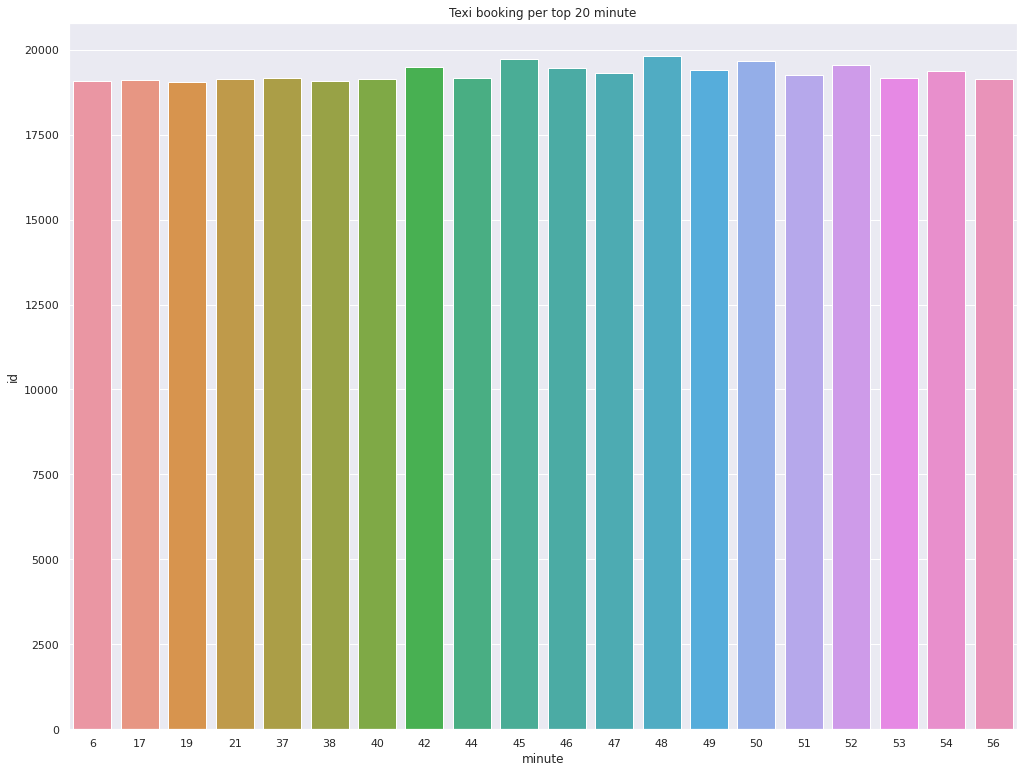

In [ ]:
plt.figure(figsize=(17,13))
plt.title('Texi booking per top 20 minute')
sns.barplot(x='minute',y='id',data=minute_df[:20])

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,Day,year,month,day_num,hour,minute,trip_duration_hour,speed
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498991,Monday,2016,3,14,17,24,0.126389,11.860150
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806074,Sunday,2016,6,12,0,43,0.184167,9.806736
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485965,Wednesday,2016,4,6,19,32,0.119167,12.469634
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188962,Saturday,2016,3,26,13,30,0.120833,9.839682
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,5.716775,Saturday,2016,5,21,7,54,0.430833,13.269110


In [ ]:
# One hot encoding
dataset= pd.get_dummies(dataset, columns=["store_and_fwd_flag", "Day"], prefix=["store_and_fwd_flag",'Day'])

In [ ]:
dataset.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,year,month,day_num,hour,minute,trip_duration_hour,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498991,2016,3,14,17,24,0.126389,11.860150,1,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.806074,2016,6,12,0,43,0.184167,9.806736,1,0,0,0,0,1,0,0,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485965,2016,4,6,19,32,0.119167,12.469634,1,0,0,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188962,2016,3,26,13,30,0.120833,9.839682,1,0,0,0,1,0,0,0,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,5.716775,2016,5,21,7,54,0.430833,13.269110,1,0,0,0,1,0,0,0,0


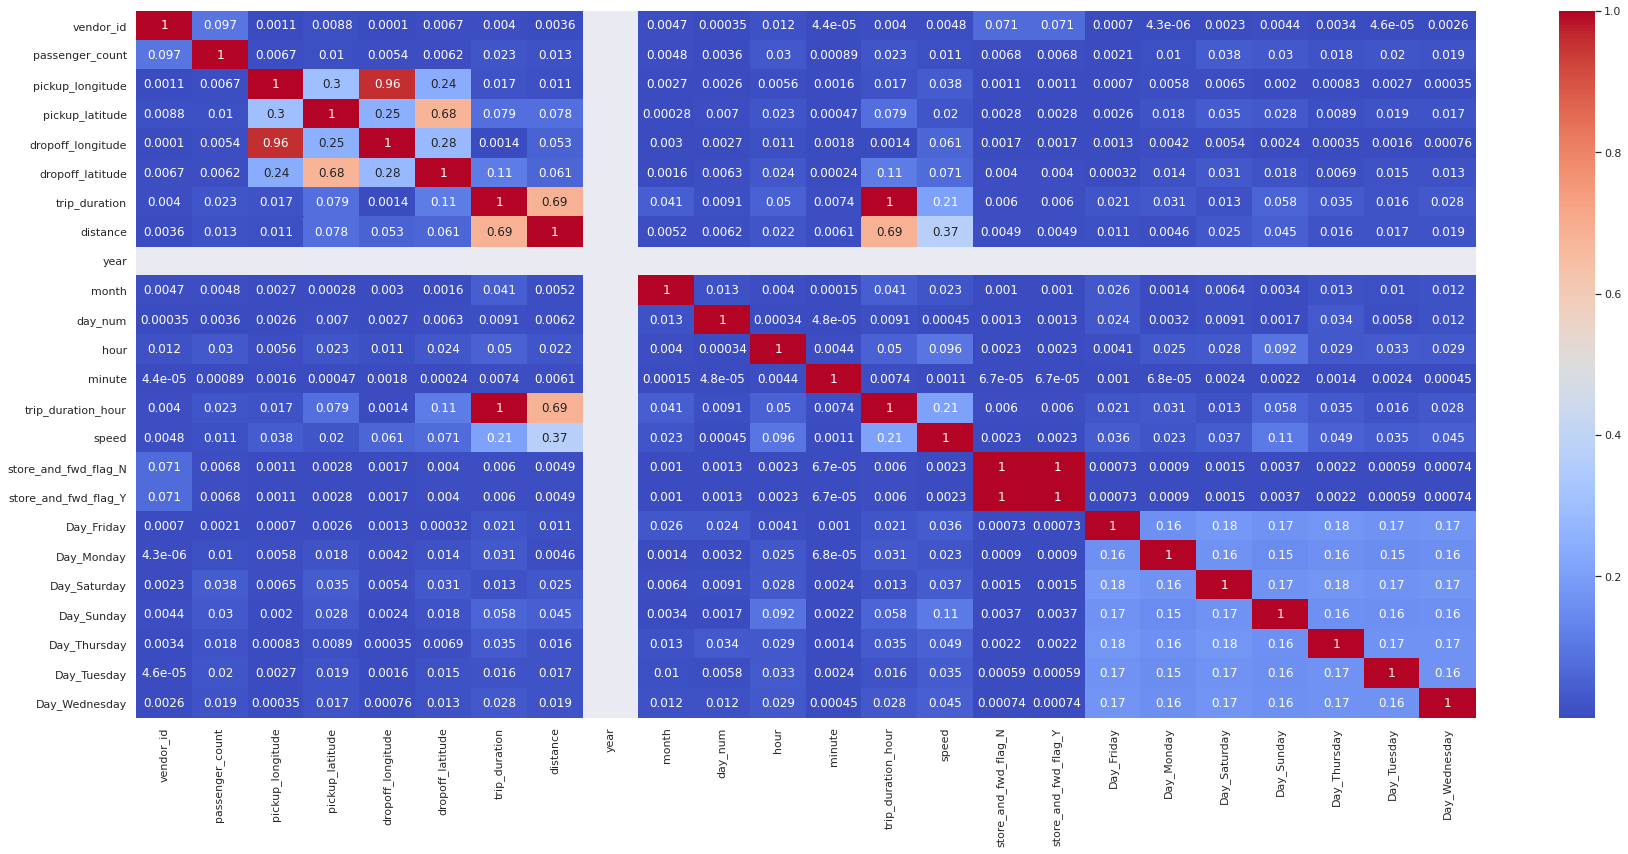

In [ ]:
## Correlation
plt.figure(figsize=(30,13))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


##***Correlation is a term that is a measure of the strength of a linear relationship between two quantitative variables (e.g., height, weight)***

##***it is 3 types***

##***1.positive correlation :A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases***

##***2.Negative correlation : Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa. In statistics, a perfect negative correlation is represented by the value -1***

##***3.Zero correlation :0 indicates no correlation***

##***In statistics, a perfect positive correlation is represented by the correlation coefficient value +1.0, while 0 indicates no correlation, and -1.0 indicates a perfect inverse (negative) correlation***

In [ ]:
dataset.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NEW_NYK_Texi_data.csv')

In [ ]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/NEW_NYK_Texi_data.csv')

In [ ]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,year,month,day_num,hour,minute,trip_duration_hour,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498991,2016,3,14,17,24,0.126389,11.860150,1,0,0,1,0,0,0,0,0
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.806074,2016,6,12,0,43,0.184167,9.806736,1,0,0,0,0,1,0,0,0
2,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485965,2016,4,6,19,32,0.119167,12.469634,1,0,0,0,0,0,0,0,1
3,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188962,2016,3,26,13,30,0.120833,9.839682,1,0,0,0,1,0,0,0,0
4,7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,5.716775,2016,5,21,7,54,0.430833,13.269110,1,0,0,0,1,0,0,0,0


In [ ]:
features=['vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance','month','hour','minute',
          'speed','store_and_fwd_flag_N','store_and_fwd_flag_Y','Day_Friday','Day_Monday','Day_Saturday','Day_Sunday','Day_Thursday','Day_Tuesday','Day_Wednesday']

In [ ]:
X=df[features][:100000]
y=df['trip_duration_hour'][:100000]

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = df[features].apply(zscore)[:100000]
y=df['trip_duration_hour'][:100000]

In [ ]:
X[:5]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,month,hour,minute,speed,store_and_fwd_flag_N,store_and_fwd_flag_Y,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,1.027061,-0.473731,-0.037376,0.619925,0.193692,0.463338,-0.514134,-0.297608,0.526178,-0.325773,-0.216577,0.072515,-0.072515,-0.424737,2.601257,-0.426872,-0.391875,-0.417147,-0.40234,-0.409507
1,-0.973652,-0.473731,-0.011546,-0.597386,-0.320322,-0.828496,-0.318811,1.488404,-2.139157,0.771417,-0.496321,0.072515,-0.072515,-0.424737,-0.384430,-0.426872,2.551837,-0.417147,-0.40234,-0.409507
2,1.027061,-0.473731,-0.451456,-1.367928,-0.508914,-1.744695,-0.522419,0.297729,0.839747,0.136202,-0.133545,0.072515,-0.072515,-0.424737,-0.384430,-0.426872,-0.391875,-0.417147,-0.40234,2.441962
3,1.027061,-0.473731,0.097781,1.667286,0.071377,1.097739,-0.711331,-0.297608,-0.100960,0.020708,-0.491833,0.072515,-0.072515,-0.424737,-0.384430,2.342625,-0.391875,-0.417147,-0.40234,-0.409507
4,1.027061,-0.473731,0.153860,1.856681,0.815504,0.274233,2.168621,0.893067,-1.041666,1.406633,-0.024629,0.072515,-0.072515,-0.424737,-0.384430,2.342625,-0.391875,-0.417147,-0.40234,-0.409507


In [ ]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#**Applying Lasso Regression to our DataSet**

In [ ]:
from sklearn.model_selection import GridSearchCV
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
lasso_regressor.score(X_train, y_train)

-0.0038012092649501368

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.004356251273739589


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

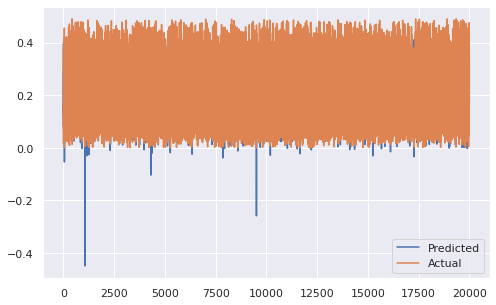

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.0033626920852462467
RMSE : 0.057988723776664086
R2 : 0.6933493275776537
Adjusted R2 :  0.6930423545835875


#**Applying Ridge Regression to our DataSet**


In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
ridge_regressor.score(X_train, y_train)

0.6872219186102868

In [ ]:
from sklearn.linear_model import Ridge
### Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
ridge_regressor.score(X_train, y_train)

-0.003436971663337074

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -0.004356251273739589


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

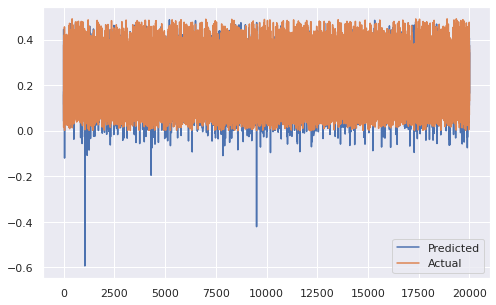

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.0026479511427116662
RMSE : 0.05145824659577575
R2 : 0.7585279954662899
Adjusted R2 :  0.7582862696496487


#**Applying XGBRegressor algorithem to our DataSet**

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [3,5,8]
learning_rate=[0.1,0.3,0.5]

# HYperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'learning_rate':learning_rate}

In [ ]:
# Create an instance of the  XGBRegressor
import xgboost as xgb
xgb_model = xgb.XGBRegressor()

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 5, verbose=2,scoring="neg_mean_squared_error")

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[13:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[13:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[13:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[13:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[13:13:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .. learning_rate=0.1, max_depth=3, n_estimators=50, total=   2.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=80 .................
[13:13:32] WARNING: /workspace/src/objective/regres

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 12.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 8],
                        

In [ ]:
xgb_grid.best_score_

-0.023081262203564278

In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
xgb_optimal_model =xgb_grid.best_estimator_

In [ ]:
y_pred_xgb=xgb_optimal_model.predict(X_test)

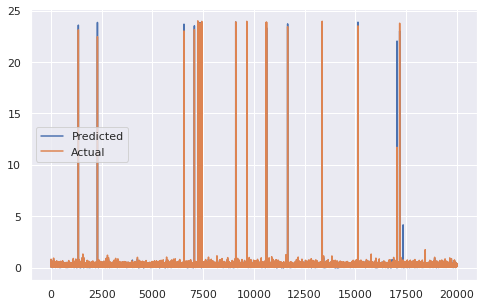

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_pred_xgb)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()-

In [ ]:
MSE  = mean_squared_error(y_test, y_pred_xgb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_pred_xgb)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.00668231646820752
RMSE : 0.08174543698707298
R2 : 0.9854958179670054
Adjusted R2 :  0.957780217764386


#**Applying GradientBoosting Algorithem to our DataSet**

In [ ]:
# Number of trees
n_estimators = [100,120]

# Maximum depth of trees
max_depth = [3,5]

# Minimum number of samples required to split a node
min_samples_split = [50,80]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]


# HYperparameter Grid
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
# Create an instance of the  GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='neg_mean_squared_error')

gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  13.8s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.8s remaining:    0.0s


[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  13.7s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=  13.7s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  16.5s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  16.5s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=  16.6s
[CV] max_depth=3, min_samples_leaf=40, min_samples_split=80, n_estimators=100 
[CV]  max_depth=3, min_samples_leaf=40, min_samples_split=80, n_estimators=100, total=  13.8s
[CV] max_depth=3, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 16.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
                            

In [ ]:
gb_grid.best_params_

{'max_depth': 3,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 120}

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
y_preds_gb = gb_optimal_model.predict(X_test)

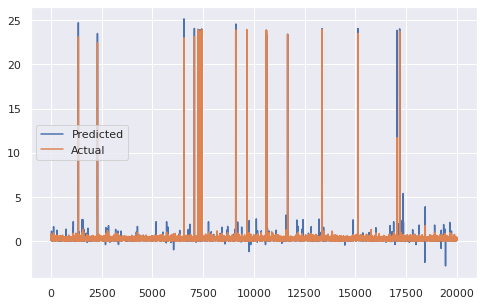

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(y_preds_gb)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error(y_test, y_preds_gb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test, y_preds_gb)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_preds_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.01795363383059947
RMSE : 0.13399117071881816
R2 : 0.9610310624359584
Adjusted R2 :  0.9609920525380015


#**Model Summary**

In [ ]:
from prettytable import PrettyTable
x = PrettyTable(['SL NO',"MODEL_NAME", "MSE", "RMSE",'R2','Adjusted R2'])
x.add_row(['1','Lasso Regression','0.003','0.057','0.693','0.693'])
x.add_row(['2','Ridge Regression ','0.002','0.051','0.758','0.758'])
x.add_row(['3','XGBRegressor','0.006','0.081','0.9854','0.9577'])
x.add_row(['4','GradientBoosting','0.017','0.133','0.961','0.960'])
print(x)

+-------+-------------------+-------+-------+--------+-------------+
| SL NO |     MODEL_NAME    |  MSE  |  RMSE |   R2   | Adjusted R2 |
+-------+-------------------+-------+-------+--------+-------------+
|   1   |  Lasso Regression | 0.003 | 0.057 | 0.693  |    0.693    |
|   2   | Ridge Regression  | 0.002 | 0.051 | 0.758  |    0.758    |
|   3   |    XGBRegressor   | 0.006 | 0.081 | 0.9854 |    0.9577   |
|   4   |  GradientBoosting | 0.017 | 0.133 | 0.961  |    0.960    |
+-------+-------------------+-------+-------+--------+-------------+
